<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C4/C4.html"><img src="../data/C4_nav.png" width="100"  style="float:right;" alt="C4"></a>
<h1>Scape Plot Representation</h1> 
</div>

<br/>

<p>
Following Section 4.3.2 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we introduce in this notebook the concept of scape plots and apply them for visualizing the fitness of segments. These plots were originally introduced into the music processing area by Sapp and then applied for structure analysis by Müller and Jiang.

<ul>
<li><span style="color:black">
Craig Stuart Sapp: <strong>Visual Hierarchical Key Analysis.</strong> ACM Computers in Entertainment 3(4):1&ndash;19, 2005.
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_Sapp05_ScapePlot_ACM-CiE.txt"> Bibtex </a>
</span></li>
    
<li><span style="color:black">
Meinard Müller, Nanzhu Jiang, and Peter Grosche: <a href="https://ieeexplore.ieee.org/document/6353546"><strong>A Robust Fitness Measure for Capturing Repetitions in Music Recordings With Applications to Audio Thumbnailing.</strong></a> IEEE Transactions on Audio, Speech, and Language Processing, 21(3): 531–543, 2013. 
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_MuellerJG13_StructureAnaylsis_IEEE-TASLP.txt"> Bibtex </a>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="https://www.audiolabs-erlangen.de/resources/MIR/SMtoolbox">MATLAB Toolbox</a></span></li>

<li><span style="color:black">
Meinard Müller, Nanzhu Jiang: <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller/publications/2012_MuellerJiang_StructureVisualization_ISMIR.pdf"><strong>A Scape Plot Representation for Visualizing Repetitive Structures of Music Recordings.</strong></a> Proceedings of the International Conference on Music Information Retrieval (ISMIR), 97&ndash;102, 2012. 
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_MuellerJiang12_ScapePlot_ISMIR.txt"> Bibtex </a>
</span></li>    
</ul>    
</p> 

## Triangular Representation of Segments

In the context of [audio thumbnailing](../C4/C4S3_AudioThumbnailing.html), we computed a [fitness measure](../C4/C4S3_AudioThumbnailing.html) that assigns to each possible segment a fitness value expressing a segment-specific property. We now introduce a representation by which a segment-dependent property can be visualized in a compact and hierarchical way. Recall that a **segment** $\alpha=[s:t]\subseteq [1:N]$ is uniquely determined by its starting point $s$ and its end point $t$. Since any two numbers $s,t\in[1:N]$ with $s\leq t$ define a segment, there are $(N+1)N/2$ different segments. Instead of considering start and end points, each segment can also be uniquely described by its center 

$$
   c(\alpha):=(s+t)/2
$$

and its length $|\alpha|$. Using the center to parameterize a horizontal axis and the length to parameterize the height, each segment can be represented by a point in a **triangular representation**. This way, the set of segments are ordered from bottom to top in a hierarchical way according to their length. In particular, the top of this triangle corresponds to the unique segment of maximal length $N$ and the bottom points of the triangle correspond to the $N$ segments of length one (where the start point coincides with the end point). Furthermore, all segments $\alpha'\subseteq\alpha$ contained in a given segment $\alpha$ correspond to points in the triangular representation that lie in a subtriangle below the point given by $\alpha$

<img src="../data/C4/FMP_C4_F19.png" width="400x" align="middle" alt="FMP_C8_F19">

Given a triangular representation of all segments within $[1:N]$, the following example visually indicates the following sets of segments (see Exercise 4.12 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>):

(a) All segments having a minimal length above a given threshold $\theta\geq 0$<br/> 
(b) All segments that contain a given segment $\alpha$<br/>
(c) All segments that are disjoint to a given segment $\alpha$<br/>
(d) All segments that contain the center $c(\alpha)$ of a given segment $\alpha$


<img src="../data/C4/FMP_C4_E12.png" width="500x" align="middle" alt="FMP_C4_E12.png">

## Scape Plot

The triangular representation can be used as a grid for visualizing a specific numeric property $\varphi(\alpha)\in\mathbb{R}$ that can be computed for all segments $\alpha$. This property, for example, can be the fitness values as used for <a href="../C4/C4S3_AudioThumbnailing.html">audio thumbnailing</a> (see Section 4.3 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>). Such a visual representation is also referred to as **scape plot** representation of the property. More precisely, we define a scape plot $\Delta$ by setting 

\begin{equation}
\label{eq:AudioStru:Thumb:SPfitness}
   \Delta(c(\alpha),|\alpha|):=\varphi(\alpha)
\end{equation}

for segment $\alpha$. As a toy example, we consider the function $\varphi$ defined by $\varphi(\alpha):= (t-s+1)/N$ for $\alpha=[s:t]$, which encodes the segment lengths relative to the total length $N$. In the following code cell, we provide a visualization function for plotting a scape plot representation of this function. 

<div class="alert alert-block alert-warning">
<strong>Note:</strong> In our implementation, we use an <code>N</code>-square matrix <code>SP</code> as data structure to the store the segment-dependent property $\varphi(\alpha)\in\mathbb{R}$. We use the first dimension of <code>SP</code> to encode the length and the second one to encode the center. Since indexing in Python starts with index <code>0</code>, one needs to be careful when interpreting the length dimension. In particular, the entry <code>SP[length_minus_one, start]</code> contains the information for the segment having length <code>length_minus_one + 1</code> for <code>length_minus_one = 0, ..., N-1</code>. Furthermore, note that only the left-upper part (including the diagonal) of <code>SP</code> is used.
</div>

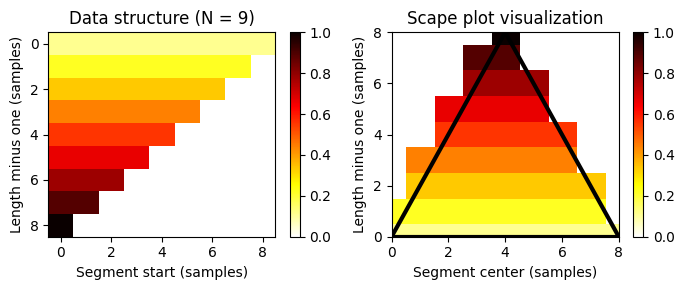

In [1]:
import numpy as np
import os, sys, librosa, math
from scipy import signal
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
import IPython.display as ipd
import pandas as pd
from numba import jit
from matplotlib.colors import ListedColormap
sys.path.append('..')
import libfmp.b
import libfmp.c4
from libfmp.b import FloatingBox

%matplotlib inline

def visualize_scape_plot(SP, Fs=1, ax=None, figsize=(4, 3), title='',
                         xlabel='Center (seconds)', ylabel='Length (seconds)', interpolation='nearest'):
    """Visualize scape plot

    Notebook: C4/C4S3_ScapePlot.ipynb

    Args:
        SP: Scape plot data (encodes as start-duration matrix)
        Fs: Sampling rate (Default value = 1)
        ax: Used axes (Default value = None)
        figsize: Figure size (Default value = (4, 3))
        title: Title of figure (Default value = '')
        xlabel: Label for x-axis (Default value = 'Center (seconds)')
        ylabel: Label for y-axis (Default value = 'Length (seconds)')
        interpolation: Interpolation value for imshow (Default value = 'nearest')

    Returns:
        fig: Handle for figure
        ax: Handle for axes
        im: Handle for imshow
    """
    fig = None
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = plt.gca()
    N = SP.shape[0]
    SP_vis = np.zeros((N, N))
    for length_minus_one in range(N):
        for start in range(N-length_minus_one):
            center = start + length_minus_one//2
            SP_vis[length_minus_one, center] = SP[length_minus_one, start]

    extent = np.array([-0.5, (N-1)+0.5, -0.5, (N-1)+0.5]) / Fs
    im = plt.imshow(SP_vis, cmap='hot_r', aspect='auto', origin='lower', extent=extent, interpolation=interpolation)
    x = np.asarray(range(N))
    x_half_lower = x/2
    x_half_upper = x/2 + N/2 - 1/2
    plt.plot(x_half_lower/Fs, x/Fs, '-', linewidth=3, color='black')
    plt.plot(x_half_upper/Fs, np.flip(x, axis=0)/Fs, '-', linewidth=3, color='black')
    plt.plot(x/Fs, np.zeros(N)/Fs, '-', linewidth=3, color='black')
    plt.xlim([0, (N-1) / Fs])
    plt.ylim([0, (N-1) / Fs])
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.tight_layout()
    plt.colorbar(im, ax=ax)
    return fig, ax, im

N = 9
SP = np.zeros((N,N))
for k in range(N):
    for s in range(N-k):
        length = k + 1
        SP[k, s]= length/N  

plt.figure(figsize=(7,3))
ax = plt.subplot(121)
plt.imshow(SP, cmap='hot_r', aspect='auto') 
ax.set_title('Data structure (N = %d)'%N)
ax.set_xlabel('Segment start (samples)')
ax.set_ylabel('Length minus one (samples)')
plt.colorbar()  

ax = plt.subplot(122)
fig, ax, im = visualize_scape_plot(SP, Fs=1, ax=ax, title='Scape plot visualization', 
                xlabel='Segment center (samples)', ylabel='Length minus one (samples)')

## Fitness Scape Plot

We now use the scape plot representation for visualizing the fitness measure for all segments. As first example, we continue with our [Brahms example](../C4/C4S1_MusicStructureGeneral.html). Recall that this piece has the musical structure $A_1A_2B_1B_2CA_3B_3B_4D$. Using settings as in [FMP notebook on audio thumbnailing](../C4/C4S3_AudioThumbnailing.html), we compute a (normalized) self-similarity matrix (SSM), which serves as input of our fitness computation. 

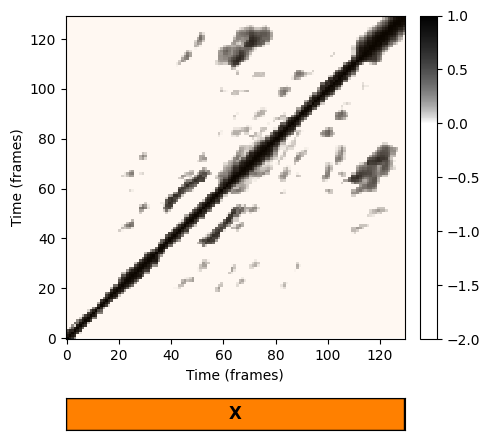

In [2]:
from CONST import calculate_ann

fn_wav = os.path.join('own_music_data', '01 Main Theme (Aberration).wav')
tempo_rel_set = libfmp.c4.compute_tempo_rel_set(0.66, 1.5, 5)
penalty = -2
x, x_duration, X, Fs_feature, S, I = libfmp.c4.compute_sm_from_filename(fn_wav, L=41, H=10, 
                        L_smooth=8, tempo_rel_set=tempo_rel_set, penalty=penalty, thresh= 0.15)
S = libfmp.c4.normalization_properties_ssm(S)

Fs = 22050
ann, color_ann, x_duration = calculate_ann(x, Fs)
ann_frames = ann

cmap_penalty = libfmp.c4.colormap_penalty(penalty=penalty)
fig, ax, im = libfmp.c4.plot_ssm_ann(S, ann_frames, Fs=1, color_ann=color_ann, cmap=cmap_penalty, 
                       xlabel='Time (frames)', ylabel='Time (frames)')

In the next code cell, we compute the fitness measure $\varphi(\alpha)\in\mathbb{R}$ (as well as the score $\sigma(\alpha)$, normalized score $\bar{\sigma}(\alpha)$, coverage $\gamma(\alpha)$, and normalized coverage $\bar{\gamma}(\alpha)$) for all segments $\alpha$. 

In [3]:
# @jit(nopython=True)
def compute_fitness_scape_plot(S):
    """Compute scape plot for fitness and other measures

    Notebook: C4/C4S3_ScapePlot.ipynb

    Args:
        S (np.ndarray): Self-similarity matrix

    Returns:
        SP_all (np.ndarray): Vector containing five different scape plots for five measures
            (fitness, score, normalized score, coverage, normlized coverage)
    """
    N = S.shape[0]
    SP_fitness = np.zeros((N, N))
    SP_score = np.zeros((N, N))
    SP_score_n = np.zeros((N, N))
    SP_coverage = np.zeros((N, N))
    SP_coverage_n = np.zeros((N, N))

    for length_minus_one in range(N):
        for start in range(N-length_minus_one):
            S_seg = S[:, start:start+length_minus_one+1]
            D, score = libfmp.c4.compute_accumulated_score_matrix(S_seg)
            path_family = libfmp.c4.compute_optimal_path_family(D)
            fitness, score, score_n, coverage, coverage_n, path_family_length = libfmp.c4.compute_fitness(
                path_family, score, N)
            SP_fitness[length_minus_one, start] = fitness
            SP_score[length_minus_one, start] = score
            SP_score_n[length_minus_one, start] = score_n
            SP_coverage[length_minus_one, start] = coverage
            SP_coverage_n[length_minus_one, start] = coverage_n
    SP_all = [SP_fitness, SP_score, SP_score_n, SP_coverage, SP_coverage_n]
    return SP_all

SP_all = compute_fitness_scape_plot(S)

Next, we visualize the fitness values $\varphi(\alpha)$ using a scape plot representation, which we also refer to as **fitness scape plot**. Furthermore, we also plot the fitness-maximizing segment or [audio thumbnail](../C4/C4S3_AudioThumbnailing.html)

$$
   \alpha^\ast := \underset{\alpha}{\mathrm{argmax}} \,\, \varphi(\alpha).
$$

along with its path family and induced segments. Note that the thumbnail as well as the induced segments are represented by points (blue and green points, respectively) in the scape plot representation. 


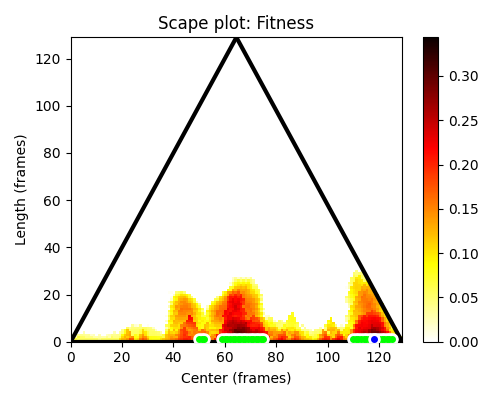
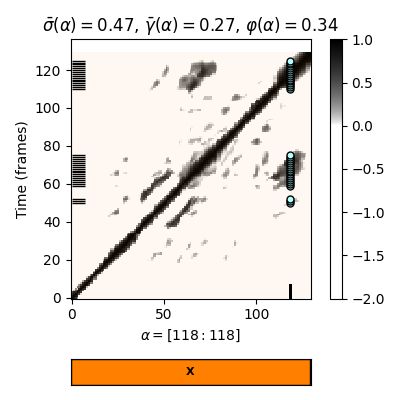

Segment (alpha): [118, 118]
Length of segment: 1
Length of feature sequence: 130
Induced segment path family:
 [[ 50  50]
 [ 51  51]
 [ 52  52]
 [ 59  59]
 [ 60  60]
 [ 61  61]
 [ 62  62]
 [ 63  63]
 [ 64  64]
 [ 65  65]
 [ 66  66]
 [ 67  67]
 [ 68  68]
 [ 69  69]
 [ 70  70]
 [ 71  71]
 [ 72  72]
 [ 73  73]
 [ 74  74]
 [ 75  75]
 [110 110]
 [111 111]
 [112 112]
 [113 113]
 [114 114]
 [115 115]
 [116 116]
 [117 117]
 [118 118]
 [119 119]
 [120 120]
 [121 121]
 [122 122]
 [123 123]
 [124 124]
 [125 125]]
Fitness: 0.3435293091
Score: 18.0807658449
Normalized score: 0.4744657179
Coverage: 36, 36
Normalized coverage: 0.2692307692
Length of all paths of family: 36


In [4]:
def seg_max_sp(SP):
    """Return segment with maximal value in SP

    Notebook: C4/C4S3_ScapePlot.ipynb

    Args:
        SP (np.ndarray): Scape plot

    Returns:
        seg (tuple): Segment ``(start_index, end_index)``
    """
    N = SP.shape[0]
    # value_max = np.max(SP)
    arg_max = np.argmax(SP)
    ind_max = np.unravel_index(arg_max, [N, N])
    seg = [ind_max[1], ind_max[1]+ind_max[0]]
    return seg

def plot_seg_in_sp(ax, seg, S=None, Fs=1):
    """Plot segment and induced segements as points in SP visualization

    Notebook: C4/C4S3_ScapePlot.ipynb

    Args:
        ax: Axis for image
        seg: Segment ``(start_index, end_index)``
        S: Self-similarity matrix (Default value = None)
        Fs: Sampling rate (Default value = 1)
    """
    if S is not None:
        S_seg = S[:, seg[0]:seg[1]+1]
        D, score = libfmp.c4.compute_accumulated_score_matrix(S_seg)
        path_family = libfmp.c4.compute_optimal_path_family(D)
        segment_family, coverage = libfmp.c4.compute_induced_segment_family_coverage(path_family)
        length = segment_family[:, 1] - segment_family[:, 0] + 1
        center = segment_family[:, 0] + length//2
        ax.scatter(center/Fs, length/Fs, s=64, c='white', zorder=9999)
        ax.scatter(center/Fs, length/Fs, s=16, c='lime', zorder=9999)
    length = seg[1] - seg[0] + 1
    center = seg[0] + length//2
    ax.scatter(center/Fs, length/Fs, s=64, c='white', zorder=9999)
    ax.scatter(center/Fs, length/Fs, s=16, c='blue', zorder=9999)

def plot_sp_ssm(SP, seg, S, ann, color_ann=[], title='', figsize=(5, 4)):
    """Visulization of SP and SSM

    Notebook: C4/C4S3_ScapePlot.ipynb

    Args:
        SP: Scape plot
        seg: Segment ``(start_index, end_index)``
        S: Self-similarity matrix
        ann: Annotation
        color_ann: color scheme used for annotations (Default value = [])
        title: Title of figure (Default value = '')
        figsize: Figure size (Default value = (5, 4))
    """
    float_box = libfmp.b.FloatingBox()
    fig, ax, im = visualize_scape_plot(SP, figsize=figsize, title=title,
                                       xlabel='Center (frames)', ylabel='Length (frames)')
    plot_seg_in_sp(ax, seg, S)
    float_box.add_fig(fig)

    penalty = np.min(S)
    cmap_penalty = libfmp.c4.colormap_penalty(penalty=penalty)
    fig, ax, im = libfmp.c4.plot_ssm_ann_optimal_path_family(
        S, ann, seg, color_ann=color_ann, fontsize=8, cmap=cmap_penalty, figsize=(4, 4),
        ylabel='Time (frames)')
    float_box.add_fig(fig)
    float_box.show()
    
def check_segment(seg, S):
    """Prints properties of segments with regard to SSM ``S``

    Notebook: C4/C4S3_ScapePlot.ipynb

    Args:
        seg (tuple): Segment ``(start_index, end_index)``
        S (np.ndarray): Self-similarity matrix

    Returns:
         path_family (list): Optimal path family
    """
    N = S.shape[0]
    S_seg = S[:, seg[0]:seg[1]+1]
    D, score = libfmp.c4.compute_accumulated_score_matrix(S_seg)
    path_family = libfmp.c4.compute_optimal_path_family(D)
    fitness, score, score_n, coverage, coverage_n, path_family_length = libfmp.c4.compute_fitness(
                path_family, score, N)
    segment_family, coverage2 = libfmp.c4.compute_induced_segment_family_coverage(path_family)
    print('Segment (alpha):', seg)
    print('Length of segment:', seg[-1]-seg[0]+1)
    print('Length of feature sequence:', N)
    print('Induced segment path family:\n', segment_family)
    print('Fitness: %0.10f' % fitness)
    print('Score: %0.10f' % score)
    print('Normalized score: %0.10f' % score_n)
    print('Coverage: %d, %d' % (coverage, coverage2))
    print('Normalized coverage: %0.10f' % coverage_n)
    print('Length of all paths of family: %d' % path_family_length)
    return path_family
    
figsize=(5,4)
SP = SP_all[0]
seg = seg_max_sp(SP)
plot_sp_ssm(SP=SP, seg=seg, S=S, ann=ann_frames, color_ann=color_ann, 
            title='Scape plot: Fitness', figsize=figsize)
plt.show()
path_family = check_segment(seg, S)

The resulting fitness scape plot reflects the musical structure in a hierarchical way. The **thumbnail segment** is $\alpha^\ast=[175:197]$, which musically corresponds to the $B_4$-part. The coordinates in the scape plot are specified by the center $c(\alpha)=186$ and the length $|\alpha|=23$. The **induced segment** family consists of the four $B$-part. Note that all four $B$-part segments have almost the same fitness and lead to more or less the same segment family. Recall that the introduced fitness measure slightly favors [shorter segments](../C4/C4S3_AudioThumbnailing.html). Therefore, since in this recording the $B_4$-part is played faster than, e.g., the $B_1$-part, the fitness measure favors the $B_4$-part segment over the $B_1$-part segment. In other words, our procedure chooses the shortest most representative segment as thumbnail.

## Normalized Score and Coverage

Next, we illustrate that in the [definition of the fitness measure](../C4/C4S3_AudioThumbnailing.html) (see also Section 4.3.1.3 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>), the normalization of score and coverage as well as the combination (harmonic mean) of the two measures is of crucial importance. To this end, we look at the scape plots of the various measures (as well as the measure-maximizing segments) individually. We start the score measure $\sigma$. The score-maximizing segment is $\alpha=[1:N]$, which is the entire recording. 


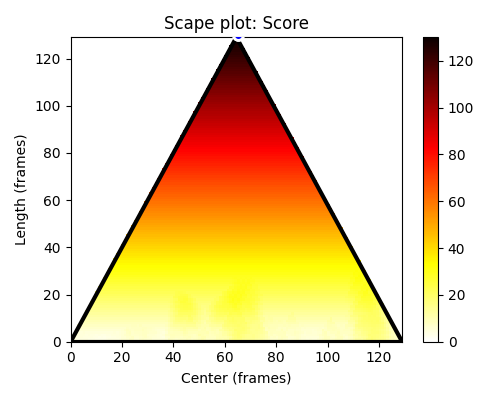
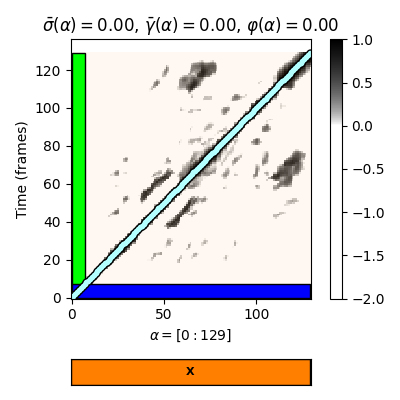

Segment (alpha): [0, 129]
Length of segment: 130
Length of feature sequence: 130
Induced segment path family:
 [[  0 129]]
Fitness: 0.0000000000
Score: 130.0000000000
Normalized score: 0.0000000000
Coverage: 130, 130
Normalized coverage: 0.0000000000
Length of all paths of family: 130


In [5]:
SP = SP_all[1]
seg = seg_max_sp(SP)
plot_sp_ssm(SP=SP, seg=seg, S=S, ann=ann_frames, color_ann=color_ann, 
            title='Scape plot: Score', figsize=figsize)
path_family = check_segment(seg, S)

Subtracting trivial self-explanations and normalizing with regard to the length of the optimal path family, yields the **normalized score** $\bar{\sigma}$. Since this measure expresses the average score of a path family without expressing how much of the audio material is actually covered, many of the small segments have a relatively high score. Using such a measure would typically result in false-positive segments of small length. This is also demonstrated by the following scape plot and the $\bar{\sigma}$-maximizing path family, 


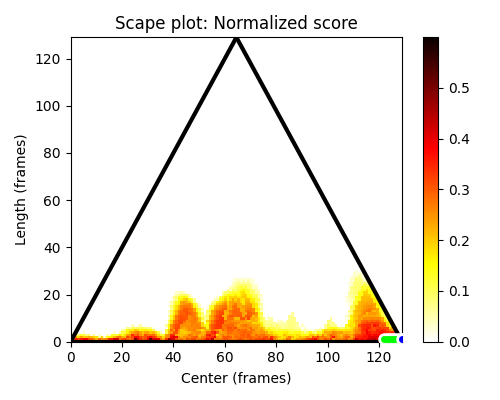
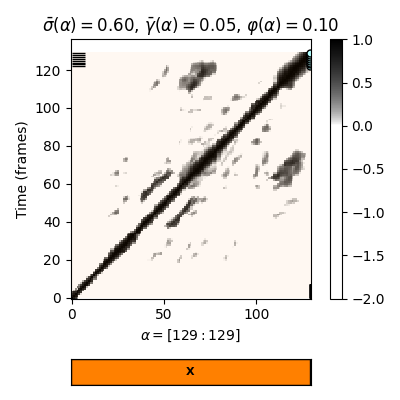

Segment (alpha): [129, 129]
Length of segment: 1
Length of feature sequence: 130
Induced segment path family:
 [[122 122]
 [123 123]
 [124 124]
 [125 125]
 [126 126]
 [127 127]
 [128 128]
 [129 129]]
Fitness: 0.0988211713
Score: 5.7986095819
Normalized score: 0.5998261977
Coverage: 8, 8
Normalized coverage: 0.0538461538
Length of all paths of family: 8


In [6]:
SP = SP_all[2]
seg = seg_max_sp(SP)
plot_sp_ssm(SP=SP, seg=seg, S=S, ann=ann_frames, color_ann=color_ann, 
            title='Scape plot: Normalized score', figsize=figsize)
path_family = check_segment(seg, S)

The next figure shows the scape plot for the coverage measure $\gamma$. As for the score, the coverage-maximizing segment is $\alpha=[1:N]$, which is the entire recording. 


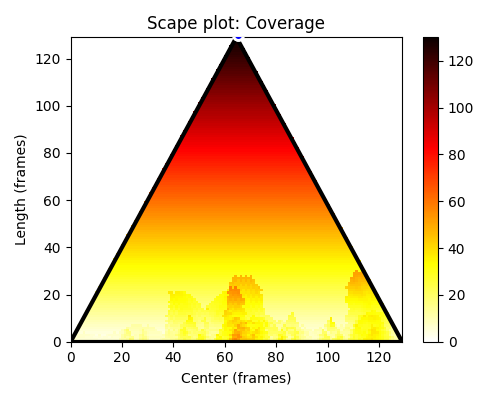
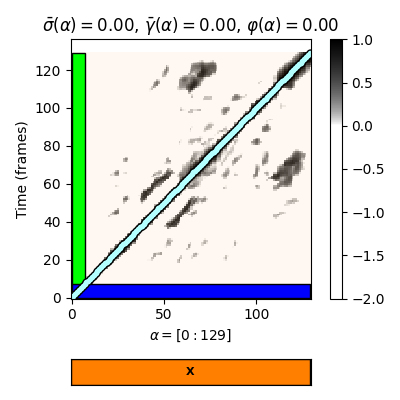

Segment (alpha): [0, 129]
Length of segment: 130
Length of feature sequence: 130
Induced segment path family:
 [[  0 129]]
Fitness: 0.0000000000
Score: 130.0000000000
Normalized score: 0.0000000000
Coverage: 130, 130
Normalized coverage: 0.0000000000
Length of all paths of family: 130


In [8]:
SP = SP_all[3]
seg = seg_max_sp(SP)
plot_sp_ssm(SP=SP, seg=seg, S=S, ann=ann_frames, color_ann=color_ann, 
            title='Scape plot: Coverage', figsize=figsize)
path_family = check_segment(seg, S)

Subtracting trivial self-explanations and normalizing with regard to the length $N$ of the  yields the **normalized coverage** $\bar{\gamma}$. As an be seen by the following scape plot along with the $\bar{\gamma}$-maximizing segment, the coverage measures a property that is conceptually different to the score. Opposed to the normalized score, the normalized coverage typically favors segments which induced segment family covers large portions of the input sequence.


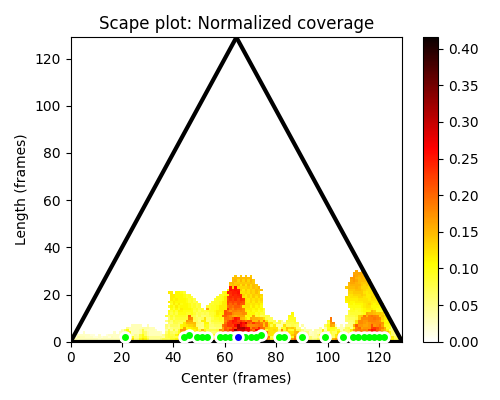
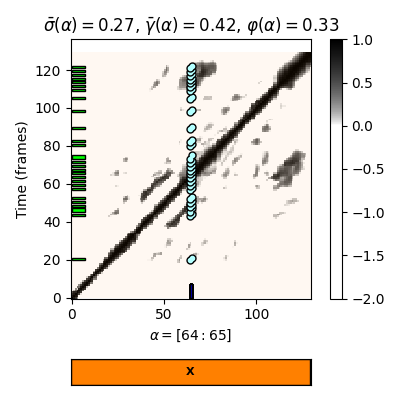

Segment (alpha): [64, 65]
Length of segment: 2
Length of feature sequence: 130
Induced segment path family:
 [[ 20  21]
 [ 43  44]
 [ 45  47]
 [ 48  49]
 [ 50  51]
 [ 52  53]
 [ 57  58]
 [ 59  60]
 [ 61  62]
 [ 63  64]
 [ 65  66]
 [ 67  68]
 [ 69  70]
 [ 71  72]
 [ 73  75]
 [ 80  81]
 [ 82  83]
 [ 89  90]
 [ 98  99]
 [105 106]
 [109 110]
 [111 112]
 [113 114]
 [115 116]
 [117 118]
 [119 120]
 [121 122]]
Fitness: 0.3276180139
Score: 16.6053985723
Normalized score: 0.2704703439
Coverage: 56, 56
Normalized coverage: 0.4153846154
Length of all paths of family: 54


In [9]:
SP = SP_all[4]
seg = seg_max_sp(SP)
plot_sp_ssm(SP=SP, seg=seg, S=S, ann=ann_frames, color_ann=color_ann, 
            title='Scape plot: Normalized coverage', figsize=figsize)
path_family = check_segment(seg, S)

## Example: Beatles Songs

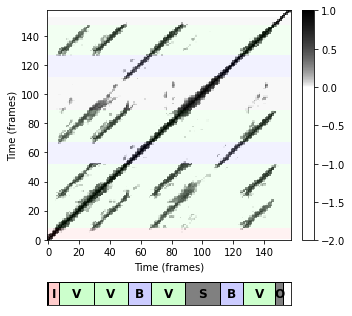

In [9]:
"""
fn_ann_color = 'FMP_C4_Audio_Beatles_YouCantDoThat.csv'
fn_ann = os.path.join('..', 'data', 'C4', fn_ann_color)
fn_wav = os.path.join('..', 'data', 'C4', 'FMP_C4_Audio_Beatles_YouCantDoThat.wav')

tempo_rel_set = libfmp.c4.compute_tempo_rel_set(0.66, 1.5, 5)
penalty = -2
x, x_duration, X, Fs_feature, S, I = libfmp.c4.compute_sm_from_filename(fn_wav, L=21, H=10, 
                        L_smooth=8, tempo_rel_set=tempo_rel_set, penalty=penalty, thresh= 0.15)
S = libfmp.c4.normalization_properties_ssm(S)

 
ann_frames, color_ann = libfmp.c4.read_structure_annotation(fn_ann, fn_ann_color, Fs=Fs_feature)
color_ann = {'I': [1, 0, 0, 0.2], 'V': [0, 1, 0, 0.2], 'B': [0, 0, 1, 0.2], '': [1, 1, 1, 0.2]}

cmap_penalty = libfmp.c4.colormap_penalty(penalty=penalty)
fig, ax, im = libfmp.c4.plot_ssm_ann(S, ann_frames, Fs=1, color_ann=color_ann, cmap=cmap_penalty, 
                       xlabel='Time (frames)', ylabel='Time (frames)')
"""


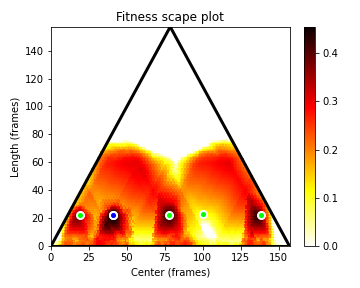
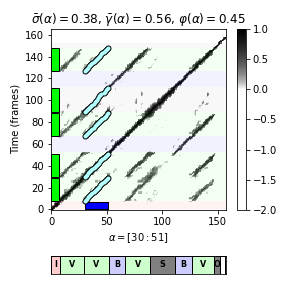

Segment (alpha): [30, 51]
Length of segment: 22
Length of feature sequence: 158
Induced segment path family:
 [[  8  29]
 [ 30  51]
 [ 67  88]
 [ 89 111]
 [127 148]]
Fitness: 0.4542030981
Score: 63.4758459114
Normalized score: 0.3805123478
Coverage: 111, 111
Normalized coverage: 0.5632911392
Length of all paths of family: 109


In [10]:
"""
SP_all = compute_fitness_scape_plot(S)
figsize=(5,4)
SP = SP_all[0]
seg = seg_max_sp(SP)
plot_sp_ssm(SP=SP, seg=seg, S=S, ann=ann_frames, color_ann=color_ann, 
            title='Fitness scape plot', figsize=figsize)
path_family = check_segment(seg, S)
"""

## Further Notes

Within the field of music processing, scape plots were originally introduced by Craig Sapp to hierarchically represent harmony in musical scores. In this notebook, we used this concept for visualizing the fitness measure for all segments in a compact and hierarchical way. This allowed us to not only gain an overview of the repetitive structure of a music recording, but also to better understand the [construction of the fitness measure](../C4/C4S3_AudioThumbnailing.html) by looking at score and coverage values separately. In particular, we demonstrated the following:

* **Normalization is important.** Without normalization (subtracting self-explanations), longer segments would typically dominate the shorter segments and the entire recording would have maximal score or fitness. 
* **Combination of score and coverage is important.** By combining score and coverage, the fitness measure balances out the two conflicting principles of having strong repetitions (high score)and of explaining possibly large portions of the recording (high coverage).

The fitness scape plot can be further refined by indicating the relations between different segments using suitable color codings. [Müller and Jiang](https://www.audiolabs-erlangen.de/fau/professor/mueller/publications/2012_MuellerJiang_StructureVisualization_ISMIR.pdf) use the lightness component of the color to indicate the fitness of the encoded segment and the hue component of the color to reveal the relations between different segments. The result of this visualization for our Brahms example is shown in the following figure.

<img src="../data/C4/FMP_C4_Teaser_Ann.png" width="300x" align="middle" alt="FMP_C4_Teaser_Ann">

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a> and Angel Villar-Corrales.
</div> 

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>